In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 切り出すための関数

In [2]:
def cut_window_by_coordinate(img, left_x, upper_y, window_width, window_height):
    """ 
    座標を指定することで、画像から矩形領域をカットする関数
    left_x : 左上のx座標
    upper_y : 左上のy座標
    window_width : 矩形の幅
    window_height : 矩形の高さ
    """
    # 窓画像の左上座標
    x, y = left_x, upper_y
    # 窓画像の幅・高さ
    w, h = window_width, window_height
    # 入力画像から窓画像を切り取り
    roi = img[y:y+h, x:x+w]    
    return roi

In [3]:
# パッチのサイズの情報
window_width = 100
window_height = 100   
slide_width = 10

#### 元画像の確認

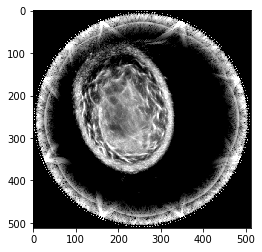

In [4]:
img = cv2.imread()
cv2.imshow("test", img)
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)

#### 切り出し範囲の確認

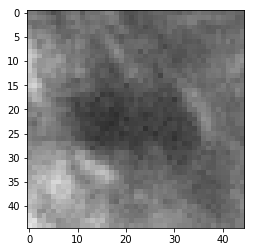

In [5]:
img = cv2.imread()
img_patch = cut_window_by_coordinate(img, 172, 253, 45, 45)
cv2.imshow("test", img_patch)
show_img = cv2.cvtColor(img_patch, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

In [6]:
# それぞれの画像について腫瘍情報のテーブルを作る
#UT007に関してはもう一度みる必要あり
pic_info = pd.DataFrame({
                'patient_id' :        ['UT001', 'UT001', 'UT001', 'UT010', 'UT010', 'UT010',  'UT010', 'UT003', 'UT003', 'UT003', 'UT007', 'UT007', 'UT007', 'UT008', 'UT008', 'UT008', 'UT009', 'UT009', 'UT009','UT011','UT011','UT011'],
                'patient_sub_height': [  '100',   '200',   '300',   '900',  '1000',  '1100',   '1200',  '1300',  '1400',  '1500',   '700',   '800',   '900',   '600',   '700',   '800',  '1500',  '1600',  '1700',  '600',  '700',  '800'],
                'patient_sub_speed':  [ '1480',  '1480',  '1480',  '1510',  '1510',  '1510',   '1510',  '1480',  '1480',  '1480',  '1523',  '1523',  '1523',  '1521',  '1521',  '1521',  '1518',  '1518',  '1518', '1523', '1523', '1523'],
                'tumor_left_x' :      [    195,     201,     198,     310,     310,     310,     310,      295,     290,    290,      180,     200,     195,     200,     200,     200,     132,     132,     127,    170,   175,     172],
                'tumor_upper_y' :     [    205,     208,     200,     225,     225,     225,     230,      300,     298,    300,      230,     250,     240,     220,     220,     220,     270,     270,     270,    245,   250,     253],
                'tumor_width' :       [     50,      50,      50,      70,      50,      45,      45,       50,      50,     50,       80,      60,      70,      70,      70,      70,      50,      50,      50,     55,    55,      45],
                'tumor_height' :      [     45,      45,      45,      45,      70,      50,      50,       35,      30,     40,       80,      60,      70,      40,      40,      40,      55,      55,      55,     55,    55,      45],
                'default_left_x' :    [    100,     100,     100,     150,    150,      150,     150,      100,     100,    100,      100,     100,     100,     100,     100,     100,     100,     100,      100,    100,   100,    100],
                'default_upper_y' :   [    100,     100,     100,     100,    100,      100,     100,      100,     100,    100,      200,     200,     200,     100,     100,     100,     100,     100,      100,    100,   100,    100],
                'max_left_x' :        [    340,     340,     340,     340,    340,      340,     340,      340,     340,    340,      220,     220,     220,     340,     340,     340,     340,     340,      340,    250,   250,    250],
                'max_upper_y' :       [    340,     340,     340,     340,    340,      340,     340,      340,     340,    340,      280,     280,     280,     240,     340,     340,     340,     340,      340,    300,   300,    300],
                'file_path' : []
                }, index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [8]:
sample_size = len(pic_info)  # 2以上である必要あり
    
data_total = pd.DataFrame()

j = 0

In [9]:
for j in range(0, sample_size, 1):

    patient_id = pic_info['patient_id'][j]
    tumor_left_x = pic_info['tumor_left_x'][j]
    tumor_upper_y = pic_info['tumor_upper_y'][j]
    tumor_width = pic_info['tumor_width'][j]
    tumor_height = pic_info['tumor_height'][j]
    default_left_x = pic_info['default_left_x'][j]
    default_upper_y = pic_info['default_upper_y'][j]
    max_left_x = pic_info['max_left_x'][j]
    max_upper_y = pic_info['max_upper_y'][j]
    file_path = pic_info['file_path'][j]
    
    img = cv2.imread(file_path)       
    
    # 写真の中の(100, 100) から (440, 440)までの間でパッチを作る
    # パッチの大きさは100 * 100にする
    # スライド幅は20ずつにする
    # sliding windowにより作られるパッチの数は (340 - 100) / 20 * (340 - 100) / 20 = 144個
    # それが5つぶんで 144 * 5 = 720個
    
    
    data = pd.DataFrame()
        
    i = 0
    for left_x in range(default_left_x, max_left_x, slide_width):
        for upper_y in range(default_upper_y, max_upper_y, slide_width):
            img_patch = cut_window_by_coordinate(img, left_x, upper_y, window_width, window_height)
            
            # ブロブ検出機による特徴抽出
            # Setup SimpleBlobDetector parameters.
            params = cv2.SimpleBlobDetector_Params() 
            # Change thresholds
            params.minThreshold = 10;
            params.maxThreshold = 200; 
            # Filter by Circularity
            params.filterByCircularity = True
            params.minCircularity = 0.2 
            # Filter by Convexity
            params.filterByConvexity = True
            params.minConvexity = 0.7 
            # Filter by Inertia
            params.filterByInertia = True
            params.minInertiaRatio = 0.01
            
            for minarea in (100, 200, 300, 400, 500):
                # 特徴抽出に関わるパラメータ
                # Filter by Area.
                params.filterByArea = True
                params.minArea = minarea
                
                # Set up the detector with default parameters.
                detector = cv2.SimpleBlobDetector_create(params)
                
                # Detect blobs.
                keypoints = detector.detect(img_patch)
                
                if minarea == 100:
                    num_blob_100 = len(keypoints)
                elif minarea == 200:
                    num_blob_200 = len(keypoints)
                elif minarea == 300:
                    num_blob_300 = len(keypoints)
                elif minarea == 400:
                    num_blob_400 = len(keypoints)
                elif minarea == 500:
                    num_blob_500 = len(keypoints)
            
            # 癌が含まれているかの判定 完全に領域を含んでいる場合のみ検出する
            if tumor_left_x >= left_x and tumor_left_x + tumor_width <= left_x + window_width and tumor_upper_y >= upper_y and tumor_upper_y + tumor_height <= upper_y + window_height:
                contains_tumor = 1 
            else: contains_tumor = 0
            
            # 角フラグを立てる
            if left_x == default_left_x or left_x == max_left_x - slide_width:
                corner_flag = 1
            else: corner_flag = 0
                   
            # patch_idの付与 一応
            patch_id = patient_id + str(left_x) + str(upper_y)      
            
            i_list = [i]
            
            tmp_df = pd.DataFrame({
                    'patch_id' : patch_id,
                    'label' : contains_tumor,
                    'num_blob_100' : num_blob_100,
                    'num_blob_200' : num_blob_200,
                    'num_blob_300' : num_blob_300,
                    'num_blob_400' : num_blob_400,
                    'num_blob_500' : num_blob_500,
                    'corner_flag' : corner_flag
                    }, index = i_list)
             
            data = data.append(tmp_df)
            i += 1
            
    data_total = data_total.append(data)            

In [12]:
data_total.to_csv('data_total.csv', index=False)

In [20]:
img = cv2.imread('../data/test_data/UT003_20170120_155205_1400_speed1480_GCF10_comp8.bmp')
img_patch = cut_window_by_coordinate(img, 290, 298, 100, 100)
cv2.imshow("test", img_patch)
cv2.waitKey(40)
cv2.destroyAllWindows()